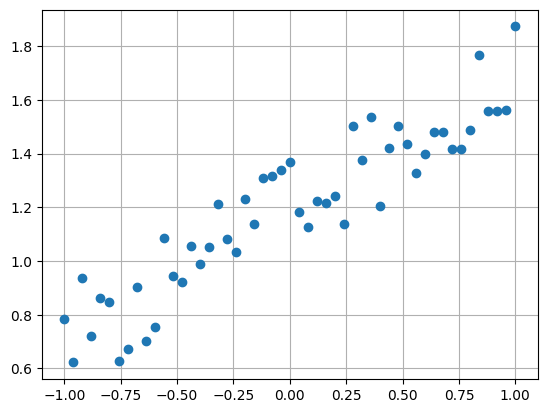

In [8]:
import numpy as np
import matplotlib.pylab as plt

np.random.seed(320)
x_train = np.linspace(-1,1,51)

f = lambda x: 0.5 * x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))

plt.plot(x_train,y_train,'o')
plt.grid()
plt.show()

np.random.seed(303)
shuffled_id = np. arange(0, len(x_train))
np.random.shuffle(shuffled_id)
x_train = x_train[shuffled_id]
y_train = y_train[shuffled_id]

def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0
    for i in range(len(x_set)):
        val += 0.5 *(w[0]*x_set[i] + w[1]-y_set[i])**2
    return val / N

def loss_grad(w,x_set,y_set):
    N = len(x_set)
    val = np.zeros(len(w))
    for i in range(len(x_set)):
        er = w[0] * x_set[i] + w[1] - y_set[i]
        val += er * np.array([x_set[i], 1.0])
    return val / N

def generate_batches(batch_size, features, labels):
    assert len(features) == len(labels)
    outout_batches = []

    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
    return outout_batches



0 [ 4. -1.] 4.579314993864028
10 [3.36748902 0.05509539] 2.114661863449622
20 [2.85966989 0.6217412 ] 1.163370846765917
30 [2.4470799  0.92319527] 0.7232771480224915
40 [2.10909494 1.08113942] 0.4806179088890847
50 [1.83067577 1.16181581] 0.3296288926560264
0 [ 4. -1.] 4.579314993864028
10 [0.83302959 1.20678435] 0.03003201597220386
20 [0.4684414 1.2013792] 0.006758172467077168
30 [0.46435817 1.19757988] 0.0067419444174559254
40 [0.46490866 1.19741605] 0.006741085572109452
50 [0.46493098 1.19741456] 0.006741066002074992


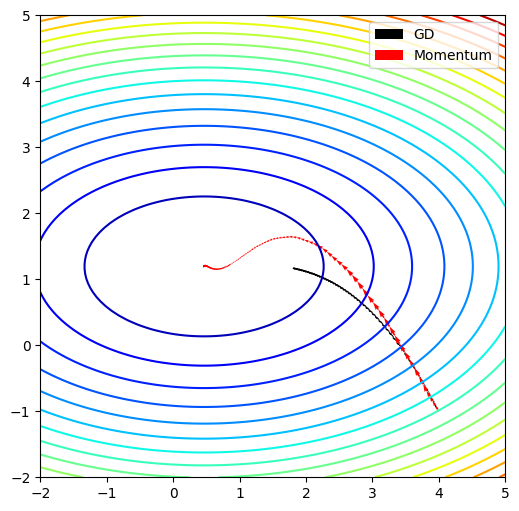

In [16]:
# GD

batch_size = 10
lr = 0.01
MaxEpochs = 51

alpha = .9

w0 = np.array([4.0,-1.0])
path_sgd=[]

for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0,x_train,y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_sgd.append(w0)
        grad = loss_grad(w0,x_batch,y_batch)
        w1 = w0 - lr * grad
        w0 = w1

# Momentum

w0 = np.array([4.0,-1.0])
path_mm=[]
velocity = np.zeros_like(w0)
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch,w0,loss(w0,x_train,y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_mm.append(w0)
        grad = loss_grad(w0,x_batch, y_batch)
        velocity = alpha * velocity - lr*grad
        w1 = w0 + velocity
        w0 = w1

W0 = np.linspace(-2,5,101)
W1 = np.linspace(-2,5,101)
W0,W1 = np.meshgrid(W0,W1)
LOSSW = W0 * 0

for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        wij = np.array([W0[i,j], W1[i,j]])
        LOSSW[i,j]=loss(wij, x_train, y_train)

fig,ax = plt.subplots(figsize=(6,6))

ax.contour(W0,W1,LOSSW,cmap=plt.cm.jet, levels = np.linspace(0, max(LOSSW.flatten()),20))
paths = path_sgd
paths = np.array(np.matrix(paths).T)

ax.quiver(paths[0,:-1],paths[1,:-1],paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1], scale_units='xy',angles='xy',scale=1,color='k')
paths = path_mm
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1],paths[1,:-1],paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1], scale_units='xy',angles='xy',scale=1,color='r')

plt.legend(['GD','Momentum'])
plt.show()

0 [ 4. -1.] 4.579314993864028
10 [0.43799693 1.21638241] 0.007111813386801515
20 [0.43799693 1.21638241] 0.007111813386800047
30 [0.43799693 1.21638241] 0.007111813386800047
40 [0.43799693 1.21638241] 0.007111813386800047
50 [0.43799693 1.21638241] 0.007111813386800047
0 [ 4. -1.] 4.579314993864028
10 [0.45317168 1.1999705 ] 0.006782855900139488
20 [0.45321417 1.19996836] 0.006782642181875964
30 [0.45325749 1.19996633] 0.006782425598655102
40 [0.4533003  1.19996428] 0.006782212022003741
50 [0.45334261 1.19996221] 0.006782001383533379


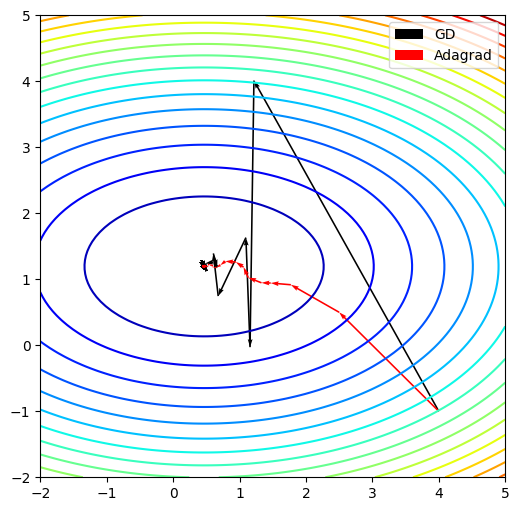

In [18]:
# SGD
batch_size = 10
lr = 1.5
MaxEpochs = 51

#Adagrad
epsilon = lr
delta = 1E-7

w0 = np.array([4.0,-1.0])
path_sgd = []
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_sgd.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        w1 = w0 - lr*grad
        w0 = w1

#Adagrad
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_adagd = []

for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch,w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_adagd.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = r + grad*grad
        delw = -epsilon / (delta + np.sqrt(r)) * grad
        w1 = w0 + delw
        w0 = w1

fig, ax = plt.subplots(figsize=(6,6))

ax.contour(W0,W1,LOSSW,cmap=plt.cm.jet, levels = np.linspace(0, max(LOSSW.flatten()),20))
paths = path_sgd
paths = np.array(np.matrix(paths).T)

ax.quiver(paths[0,:-1],paths[1,:-1],paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1], scale_units='xy',angles='xy',scale=1,color='k')
paths = path_adagd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1],paths[1,:-1],paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1], scale_units='xy',angles='xy',scale=1,color='r')

plt.legend(['GD','Adagrad'])
plt.show()

0 [ 4. -1.] 4.579314993864028
10 [1.6153188  1.01038019] 0.25234878363881025
20 [0.98465014 1.19069321] 0.053196556736343825
30 [0.70781172 1.20756929] 0.01686965476866836
40 [0.57927308 1.20449025] 0.00896812491001545
50 [0.51875391 1.20119494] 0.007221233784661749
0 [ 4. -1.] 4.579314993864028
10 [0.39349326 1.23710405] 0.008560244863137834
20 [0.36918551 1.25040353] 0.009930444130181078
30 [0.36924013 1.2503992 ] 0.009928352276478295
40 [0.36924089 1.25039879] 0.009928303969348361
50 [0.36924089 1.25039879] 0.009928303832625024


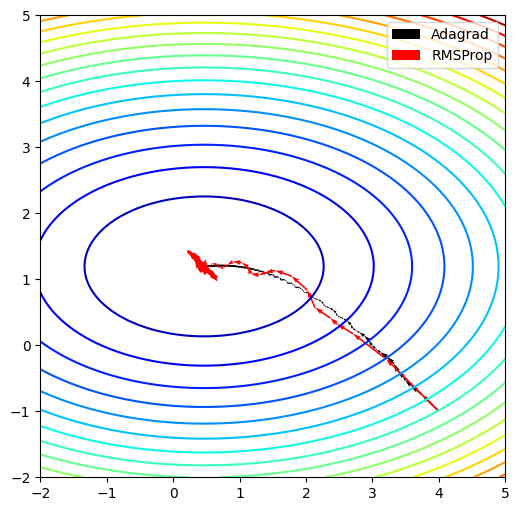

In [21]:
MaxEpochs = 51
batch_size = 10

#Adagrad
epsilon = 0.25
delta = 1E-6

#RMSProp
rho = 0.9

w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_adagd = []

for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_adagd.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = r + grad*grad
        delw = -epsilon / (delta + np.sqrt(r)) * grad
        w1 = w0 + delw
        w0 = w1

#RMSProp
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_rmsprop = []

for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_rmsprop.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = rho*r + (1.-rho)* grad*grad
        delw = -epsilon *grad / np.sqrt(delta+r)
        w1 = w0 + delw
        w0 = w1


fig, ax = plt.subplots(figsize=(6,6))

ax.contour(W0,W1,LOSSW,cmap=plt.cm.jet, levels = np.linspace(0, max(LOSSW.flatten()),20))

paths = path_adagd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1],paths[1,:-1],paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1], scale_units='xy',angles='xy',scale=1,color='k')

paths = path_rmsprop
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1],paths[1,:-1],paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1], scale_units='xy',angles='xy',scale=1,color='r')

plt.legend(['Adagrad','RMSProp'])
plt.show()

0 [ 4. -1.] 4.579314993864028
10 [0.46456558 1.20512106] 0.006789718705465277
20 [0.43674458 1.21300852] 0.007058189427519757
30 [0.43674954 1.21300674] 0.007058105455299312
40 [0.43674954 1.21300674] 0.007058105454484383
50 [0.43674954 1.21300674] 0.007058105454484373
0 [ 4. -1.] 4.579314993864028
10 [0.50374253 1.27270463] 0.009991311458367447
20 [0.46748373 1.20122063] 0.00675684656345232
30 [0.46421774 1.1973704 ] 0.006741555264123772
40 [0.46458265 1.19746515] 0.0067414585756450235
50 [0.46452398 1.19749213] 0.006741575079068978


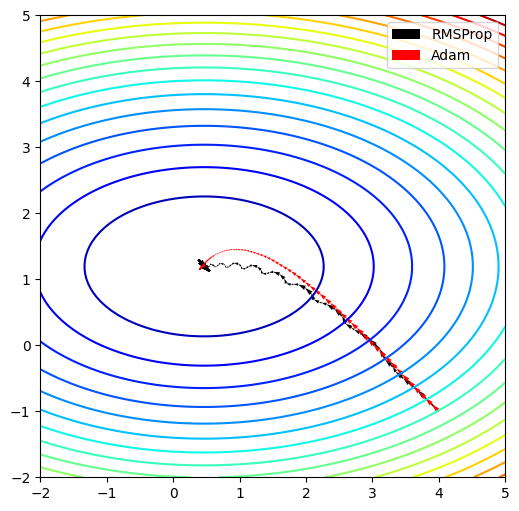

In [22]:
MaxEpochs = 51
batych_size = 10
epsilon = 0.1
delta = 1E-6

#RMSprop
rho = 0.9

#Adam
delta_adam = 1E-8
rho1 = 0.9
rho2 = 0.999

#RMSProp
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_rmsprop = []

for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_rmsprop.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = rho*r + (1.-rho)* grad*grad
        delw = -epsilon *grad / np.sqrt(delta+r)
        w1 = w0 + delw
        w0 = w1

#Adam
w0 = np.array([4.0, -1.0])
s = np.zeros_like(w0)
r = np.zeros_like(w0)
path_adam = []
t = 0

for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_adam.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        s = rho1 * s + (1.- rho1) * grad
        r = rho2 * r + (1.- rho2) * (grad*grad)
        t += 1
        shat = s / (1.-rho1 ** t)
        rhat = r / (1.-rho2 ** t)

        delw = -epsilon * shat / (delta_adam + np.sqrt(rhat))
        w1 = w0 + delw
        w0 = w1


fig, ax = plt.subplots(figsize=(6,6))

ax.contour(W0,W1,LOSSW,cmap=plt.cm.jet, levels = np.linspace(0, max(LOSSW.flatten()),20))

paths = path_rmsprop
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1],paths[1,:-1],paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1], scale_units='xy',angles='xy',scale=1,color='k')

paths = path_adam
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1],paths[1,:-1],paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1], scale_units='xy',angles='xy',scale=1,color='r')

plt.legend(['RMSProp','Adam'])
plt.show()